# Libraries import 

Import the libraries necessary for this lab. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

#  Data Cleaning

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [2]:
df = pd.read_csv('bank data.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Identify missing values 

We will use the following function to identify missing data

(1) .isnull()

(2) .notnull()

The output is a boolean value indicating whether the value that is passed into the argument is indeed missing data.

In [3]:
missing_data = df.isnull()
missing_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


"False" indicates that the value is not missing, however this might not be true for the entire dataset since we only printed the first 5 rows.

#### Count the missing values in each column

In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
    

age
False    11162
Name: age, dtype: int64

job
False    11162
Name: job, dtype: int64

marital
False    11162
Name: marital, dtype: int64

education
False    11162
Name: education, dtype: int64

default
False    11162
Name: default, dtype: int64

balance
False    11162
Name: balance, dtype: int64

housing
False    11162
Name: housing, dtype: int64

loan
False    11162
Name: loan, dtype: int64

contact
False    11162
Name: contact, dtype: int64

day
False    11162
Name: day, dtype: int64

month
False    11162
Name: month, dtype: int64

duration
False    11162
Name: duration, dtype: int64

campaign
False    11162
Name: campaign, dtype: int64

pdays
False    11162
Name: pdays, dtype: int64

previous
False    11162
Name: previous, dtype: int64

poutcome
False    11162
Name: poutcome, dtype: int64

deposit
False    11162
Name: deposit, dtype: int64



Based on the results above, each column has 11162 rows of data and only one of the columns contain no missing data

## Dealing with missing data 

The are two methods that we can use to deal with missing data:

(1) Drop data

(a) Drop the whole row

(b) Drop the whole column

(2) Replace data 

(a) Replace it by mean 

(b) Replace it by frequency

(c) Replace it based on other functions

Whole columns should be droppped if most entries are empty. In our dataset, none of the columns are empty enough to be dropped entirely. We will apply the replace data with mean method to the "Income" column.

In [5]:
# Calculate the mean for the Income column
#avg_income = df["Income"].astype("float").mean()
#print("Average Income:", avg_income)

In [6]:
# Replace NaN values with the mean value in the "Income" column
#df["Income"].replace(np.nan, avg_income, inplace=True)

## Correct data format

The last step in cleaning our data is to ensure that all data is in the correct format (int, float, category or other)

In pandas, we use

.dtype() to check the data type

The last step in cleaning our data is to ensure that all data is in the correct format (int, float, category or other)

In pandas, we use

.dtype() to check the data type

.astype() to change the data type

Let's list the data type for each column

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Now we have obtained a cleaned dataset with no missing values with all the data in its proper format.

# Dataset exploration

In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [8]:
df = pd.read_csv('bank data.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Let's look at the dataset size, feature names and their types

In [9]:
df.shape

(11162, 17)

The dataset contains 2240 objects(rows), for each of which 17 features are set(columns)

### Attributing information

Output the column(feature) names:

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

To see the general information on all the DataFrame features (columns), we use the info method:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


The method describe shows the main statistical characteristics of the dataset for each numerical feature (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


The Mean row shows the feature average, STD is an RMS (Root Mean Square) deviation, min,max - the minimum and maximum values, 25%, 50%, 75%- quarters that split the dataset (or part of it) into four groups containing approximately an equal number of observations (rows). 

To see the statistics on non-numeric features, you need to explicitly specify the feature types by the include parameter. You can also set include = all to output statistics on all the existing features.

In [13]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


The result shows that the average client refers to administrative staff (job = management.), is married (marital = married) and has a university degree (education = secondary).

For categorical (type object) and boolean (type bool) features you can use the value_counts method. Let's look at the target feature (deposit) distribution:

In [14]:
df["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

5289 clients (47.4%) of 11162 issued a term deposit, the value of the variable 'deposit' equals 'yes'.

Let's look at the client distribution by the variable `marital`. Specify the value of the `normalize = True` parameter to view relative frequencies, but not absolute.

In [15]:
df["marital"].value_counts(normalize = True)

married     0.568984
single      0.315176
divorced    0.115839
Name: marital, dtype: float64

As we can see, 57% (0.57) of clients are married, which must be taken into account when planning marketing campaigns to manage deposit operations.

In [16]:
df["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

### Sorting 

A DataFrame can be sorted by a few feature values. In our case, for example, by duration (ascending = True for sorting in ascending order):

In [17]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
271,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
7198,30,admin.,married,secondary,no,1310,no,no,telephone,27,oct,3284,1,-1,0,unknown,no
883,36,self-employed,single,tertiary,no,-103,yes,yes,telephone,17,oct,3253,1,-1,0,unknown,yes
358,28,admin.,single,secondary,no,-7,no,yes,unknown,26,jun,3183,2,-1,0,unknown,yes
4364,53,admin.,married,secondary,no,849,yes,no,cellular,6,feb,3102,3,-1,0,unknown,yes


The sorting results show that the longest calls exceed one hour, as the value duration is more than 3600 seconds or 1 hour. At the same time, it usually was on day 9 and, especially, in June (month).

## Application of functions: apply, map etc.

#### Apply the max function to each column:

In [18]:
df.apply(np.max)

age               95
job          unknown
marital       single
education    unknown
default          yes
balance        81204
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        3881
campaign          63
pdays            854
previous          58
poutcome     unknown
deposit          yes
dtype: object

The oldest client is 95 years old (age = 95), and the number of contacts with one of the customers reached 63 (campaign = 63).

The apply method can also be used to apply the function to each row. To do this, you need to specify the axis = 1.

#### Apply the map function to each column:

The map can also be used for the values replacement in a column by passing it as an argument dictionary in form of {old_value: new_value}.

In [19]:
#mapping for the deposit column
a= {"no": 0, "yes": 1}
df["deposit"] = df["deposit"].map(a)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


## Pivot tables

In [20]:
pd.crosstab(df["deposit"], df["marital"], normalize='index')

marital,divorced,married,single
deposit,,,
0,0.114252,0.612294,0.273455
1,0.117603,0.520892,0.361505


In Pandas, pivot tables are implemented by the method pivot_table with such parameters:

    values – a list of variables to calculate the necessary statistics,
    index – a list of variables to group data,
    aggfunc — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.

Let's find the average age and the call duration for different types of client employment job:

In [21]:
df.pivot_table(values=["age","duration"],index=["job"],aggfunc = "mean").head(5)

,age,duration
job,,
admin.,39.374063,347.929535
blue-collar,39.505144,394.658951
entrepreneur,42.887195,370.182927
housemaid,47.445255,348.346715
management,40.218239,361.482073


The obtained results allow you to plan marketing banking campaigns more effectively.

## Visualization in Pandas

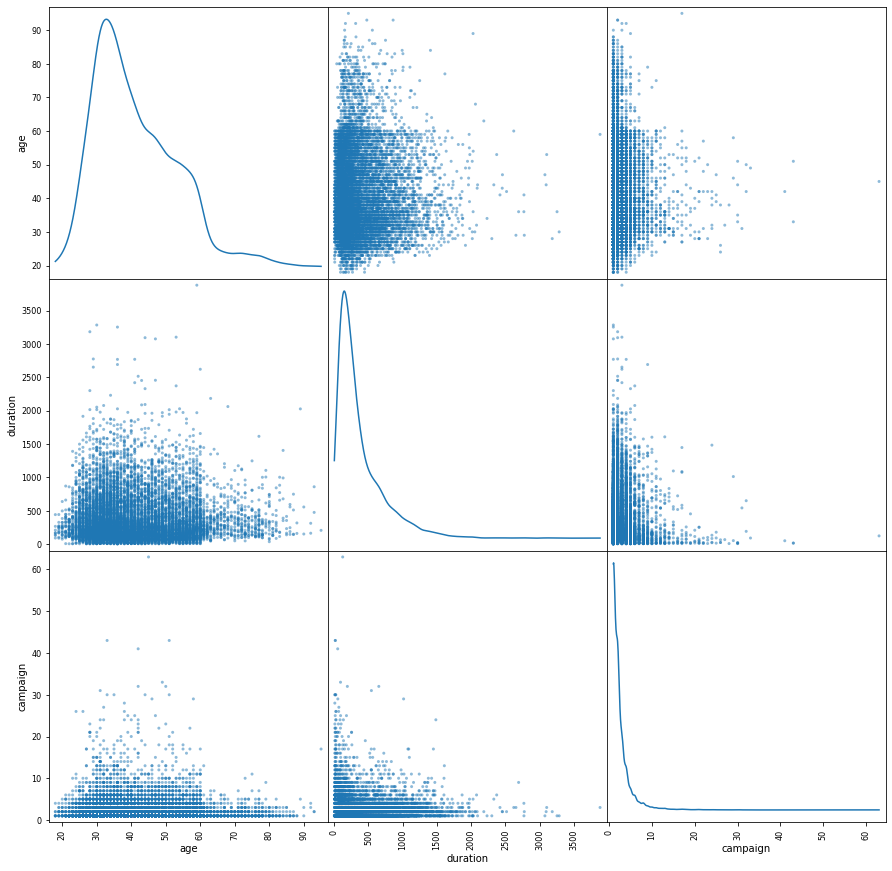

In [22]:
pd.plotting.scatter_matrix(
    df[["age", "duration","campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other. The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for age, and for a call duration and the number of contacts, the geometric distribution is more suitable.

#### We also build a separate histogram for each feature:

Text(0.5, 0, 'age')

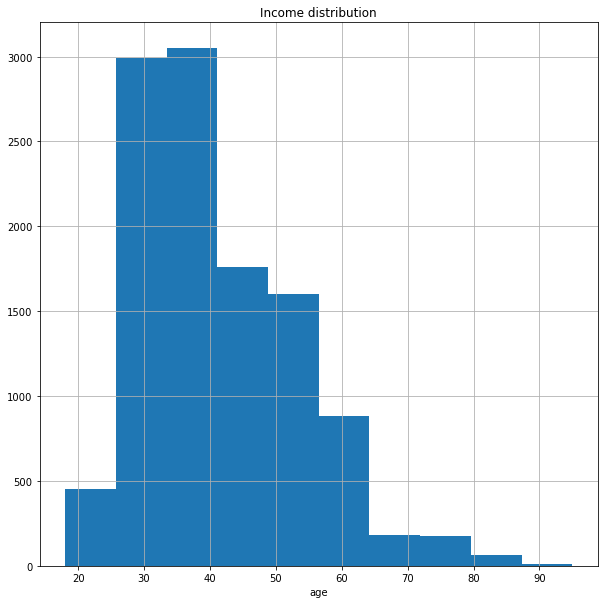

In [23]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)
df["age"].hist()
plt.title('Income distribution')
plt.xlabel('age')

#### Or we can also build it for all together:

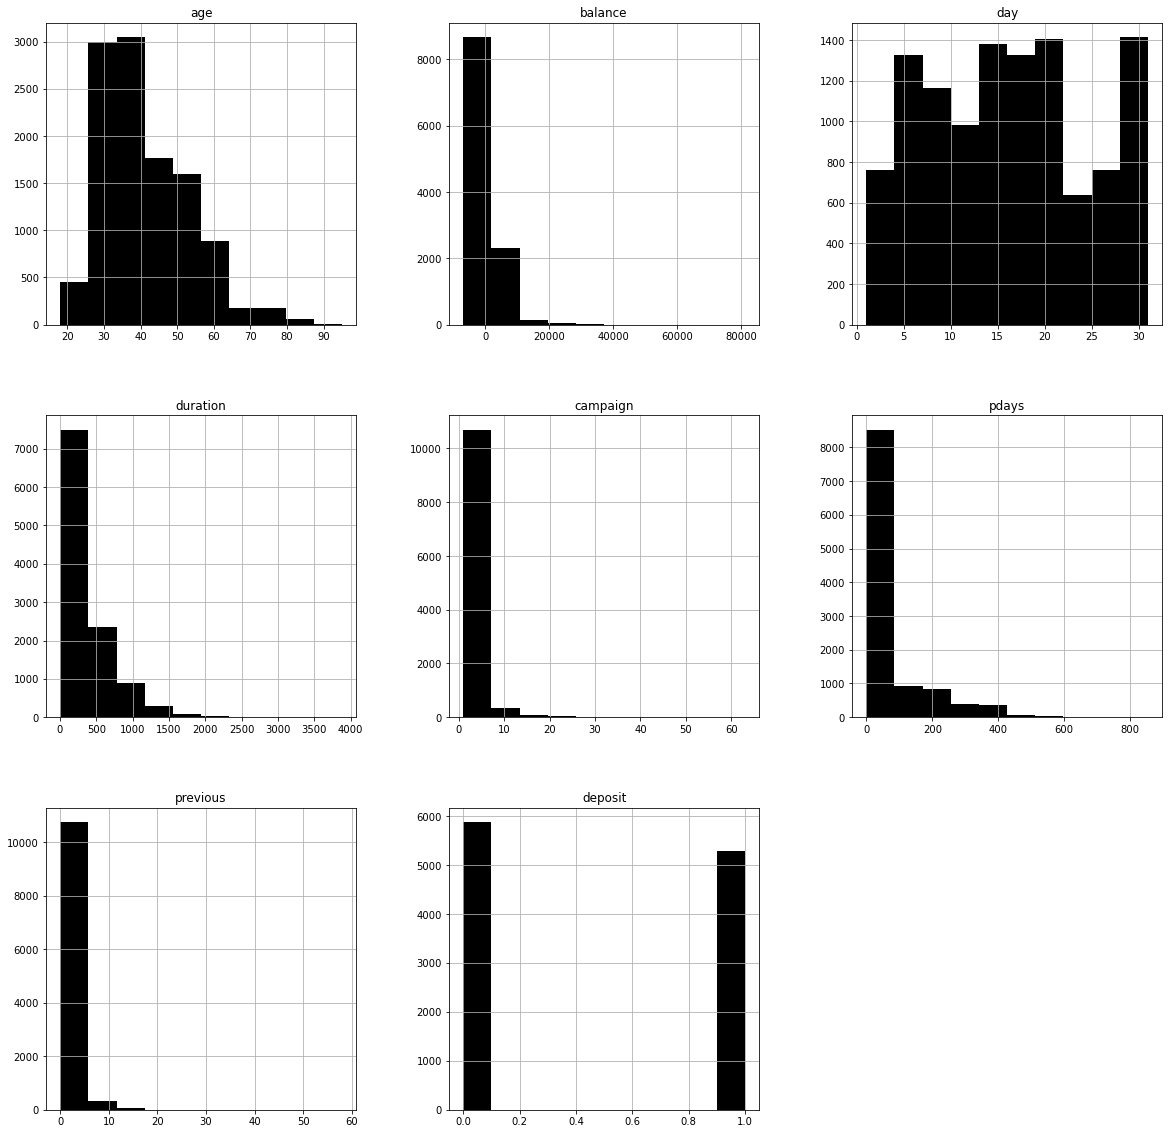

In [24]:
df.hist(color = "k",
        bins = 10,
        figsize = (20, 20))
plt.show()

A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.

While plots such as histogram are used mostly for continous variables, we may also want to investigate the relationship between 
categorical variables. One of the plots used to represent categorical variables is the Box and whisker plot.

Box and whisker plot is useful too. It allows you to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).

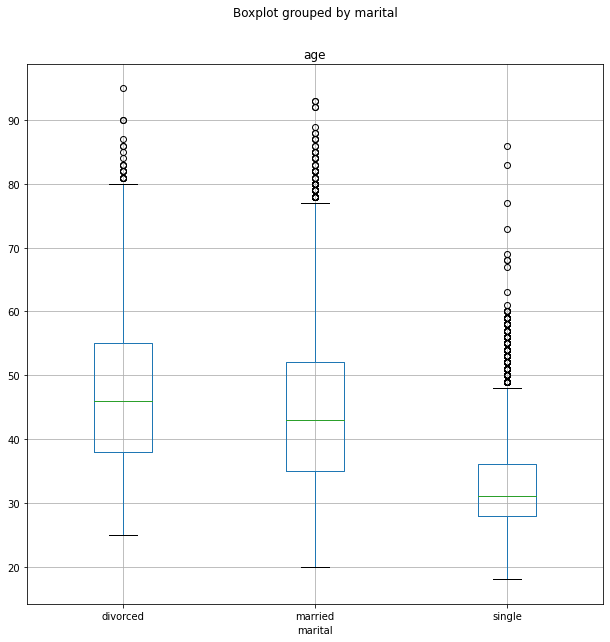

In [25]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)
df.boxplot(column = "age",
           by = "marital")
plt.show()

The plot shows that unmarried people are on average younger than divorced and married ones. For the last group, there is an outlier zone over 70 years old.

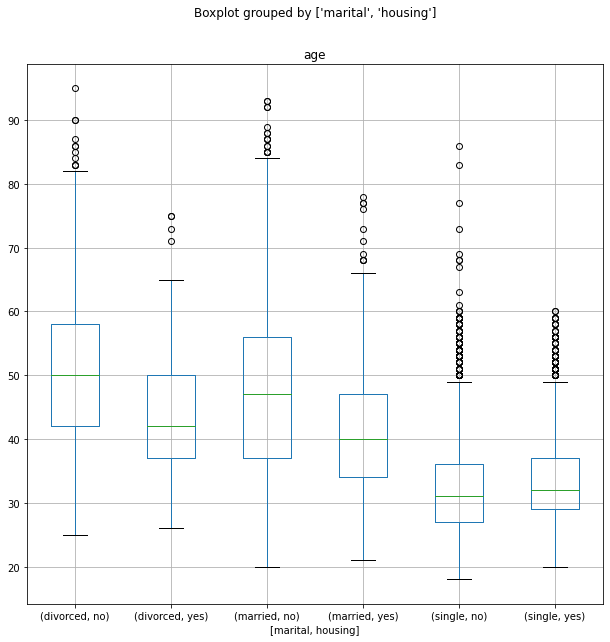

In [26]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)
df.boxplot(column = "age",
           by = ["marital","housing"])
plt.show()

As you can see, age and marital status do not have any significant influence on having a housing loan

In [27]:
df = df.replace({"admin.": 1, "blue-collar": 2, "entrepreneur": 3, "housemaid": 4, "management": 5, "retired": 6, "self-employed": 7, "services": 8,"student": 9, "technician": 10, "unemployed": 11, "unknown": 12})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,married,secondary,no,2343,yes,no,12,5,may,1042,1,-1,0,12,1
1,56,1,married,secondary,no,45,no,no,12,5,may,1467,1,-1,0,12,1
2,41,10,married,secondary,no,1270,yes,no,12,5,may,1389,1,-1,0,12,1
3,55,8,married,secondary,no,2476,yes,no,12,5,may,579,1,-1,0,12,1
4,54,1,married,tertiary,no,184,no,no,12,5,may,673,2,-1,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,12,0
11158,39,8,married,secondary,no,733,no,no,12,16,jun,83,4,-1,0,12,0
11159,32,10,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,12,0
11160,43,10,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [28]:
df = df.replace({"divorced": 1, "married": 2, "single": 3, "unknown":4 })
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,2,secondary,no,2343,yes,no,12,5,may,1042,1,-1,0,12,1
1,56,1,2,secondary,no,45,no,no,12,5,may,1467,1,-1,0,12,1
2,41,10,2,secondary,no,1270,yes,no,12,5,may,1389,1,-1,0,12,1
3,55,8,2,secondary,no,2476,yes,no,12,5,may,579,1,-1,0,12,1
4,54,1,2,tertiary,no,184,no,no,12,5,may,673,2,-1,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,3,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,12,0
11158,39,8,2,secondary,no,733,no,no,12,16,jun,83,4,-1,0,12,0
11159,32,10,3,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,12,0
11160,43,10,2,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [29]:
df = df.replace({"primary": 1, "secondary": 2, "tertiary": 3, "unknown": 4})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,2,2,no,2343,yes,no,12,5,may,1042,1,-1,0,12,1
1,56,1,2,2,no,45,no,no,12,5,may,1467,1,-1,0,12,1
2,41,10,2,2,no,1270,yes,no,12,5,may,1389,1,-1,0,12,1
3,55,8,2,2,no,2476,yes,no,12,5,may,579,1,-1,0,12,1
4,54,1,2,3,no,184,no,no,12,5,may,673,2,-1,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,3,1,no,1,yes,no,cellular,20,apr,257,1,-1,0,12,0
11158,39,8,2,2,no,733,no,no,12,16,jun,83,4,-1,0,12,0
11159,32,10,3,2,no,29,no,no,cellular,19,aug,156,2,-1,0,12,0
11160,43,10,2,2,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


# Model Development

In this section we will develop a model that will predict which customers are likely to take up the fixed deposit.

Some questions we want to answer for this problem include

(a) Which features have the greatest impact?
(b) how do they impact the prediction?



A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

### Importing libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [31]:
X = df[['age', 'job','marital', 'education','duration','campaign']] .values
X[0:5]

array([[  59,    1,    2,    2, 1042,    1],
       [  56,    1,    2,    2, 1467,    1],
       [  41,   10,    2,    2, 1389,    1],
       [  55,    8,    2,    2,  579,    1],
       [  54,    1,    2,    3,  673,    2]], dtype=int64)

In [32]:
y=df['deposit'].values

y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [33]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.49150488, -1.39160402, -0.31867191, -0.30214021,  1.93022589,
        -0.55416834],
       [ 1.23967567, -1.39160402, -0.31867191, -0.30214021,  3.15461161,
        -0.55416834],
       [-0.0194704 ,  1.39910458, -0.31867191, -0.30214021,  2.92990082,
        -0.55416834],
       [ 1.1557326 ,  0.77894711, -0.31867191, -0.30214021,  0.59636568,
        -0.55416834],
       [ 1.07178952, -1.39160402, -0.31867191,  0.1689436 ,  0.86717099,
        -0.18678537]])

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8929, 6) (8929,)
Test set: (2233, 6) (2233,)


## Classification Algorithm(K nearest neighbor)



In [36]:
#Since we have categorical variables in our data, it is better for us to rather use a classification algorithm when building our model. On of the algorithms that we will use is the K nearest neighbor algorithm.

### K nearest neighbor (KNN)

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

In this sense, it is important to consider the value of k. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.

##### Import library

Classifier implementing the k-nearest neighbors vote.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [39]:
yhat = neigh.predict(X_test)
yhat[0:5]

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 1, 1], dtype=int64)

In [40]:
#Model evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8110650688766939
Test set Accuracy:  0.7066726377071205


C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat6 = neigh6.predict(X_test)
# model evaluation
print('Train set accuracy: ',metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, yhat6))

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

Train set accuracy:  0.7958337999776011
Test set accuracy:  0.7223466188983431


In [42]:
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

array([0.68786386, 0.67442902, 0.71652485, 0.70667264, 0.72145096,
       0.72234662, 0.72548142, 0.72458576, 0.73757277])

## Model Evaluation Using Visualization

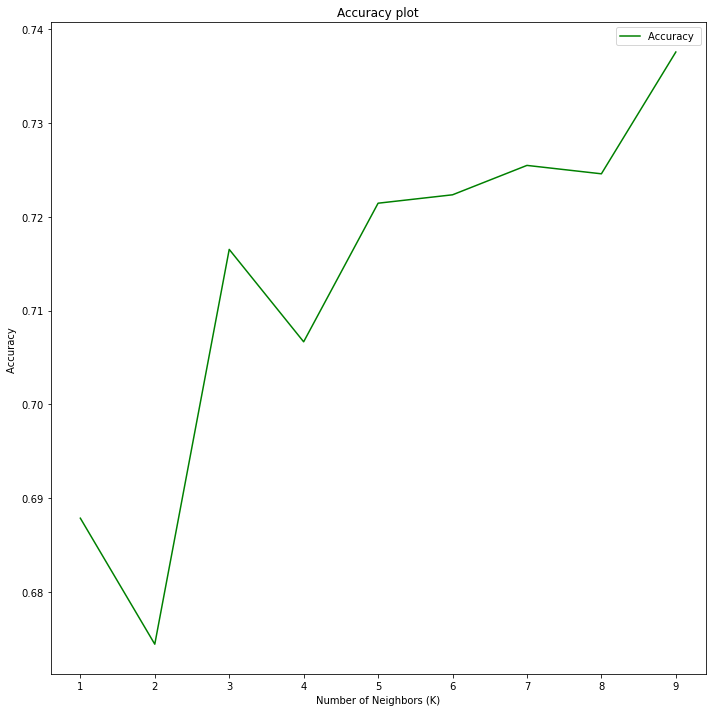

In [43]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.title('Accuracy plot')
plt.tight_layout()
plt.show()

In [44]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7375727720555306 with k= 9


It can be seen from the above plot that the features that have the greatest impact on the deposit (with a certain degree of accuracy are):
    
    age
    
    job
    
    marital
    
    education
    
    duration
    
    campaign

Some of the challenges that I encoutered when completing this task include:
(1) Since most of the data entries were categorical variables, I first had to convert them into numerical values so that I can be able to build a model.

In [45]:
import pickle

In [46]:
pickle.dump(neigh,open('neighmodel.pkl','wb'))

In [49]:
pickled_model=pickle.load(open('neighmodel.pkl','rb'))

In [50]:
#prediction
pickled_model.predict(X_test)

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [51]:
from platform import python_version
print(python_version())

3.9.12
